<a href="https://colab.research.google.com/github/GavenDcosta/ML_codes/blob/main/heartdisease_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer


In [16]:
# Step 2: Load the dataset
# Assuming 'heartdisease.csv' is in your Colab environment
file_path = '/content/heartdisease.csv'  # Replace with the correct path if needed
df = pd.read_csv(file_path)

# Step 3: Check the dataset
print("First few rows of the dataset:\n", df.head())
print("\nShape of the dataset:", df.shape)

# Step 4: Check for missing values
print("\nMissing values in the dataset:\n", df.isnull().sum())


# Step 4: Impute missing values
# Replace missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)




First few rows of the dataset:
    male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0 

In [22]:
# Step 5: Check again for missing values (to ensure imputation worked)
print("\nMissing values after imputation:\n", df_imputed.isnull().sum().sum())


Missing values after imputation:
 0


In [17]:
# Step 5: Perform detailed EDA (Exploratory Data Analysis)

# Display summary statistics
print("\nDataset Description:\n", df.describe())





Dataset Description:
               male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0

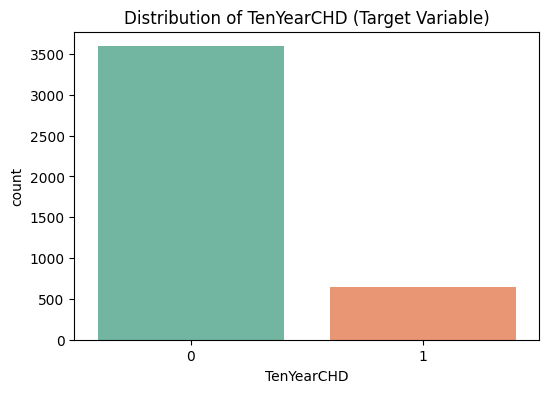

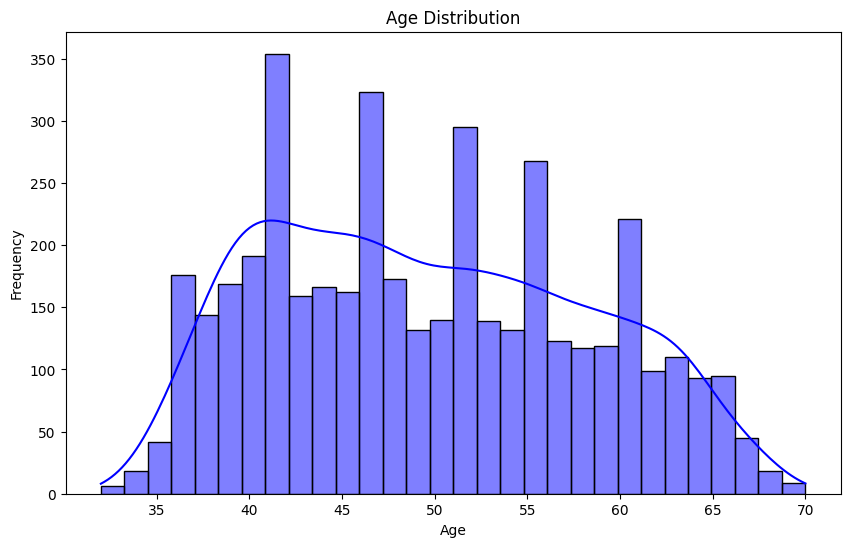

In [18]:
# Check the distribution of the target variable 'TenYearCHD'
plt.figure(figsize=(6,4))
sns.countplot(x='TenYearCHD', data=df, palette="Set2")
plt.title('Distribution of TenYearCHD (Target Variable)')
plt.show()

# Visualize the distribution of the 'age' column
plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde=True, bins=30, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()



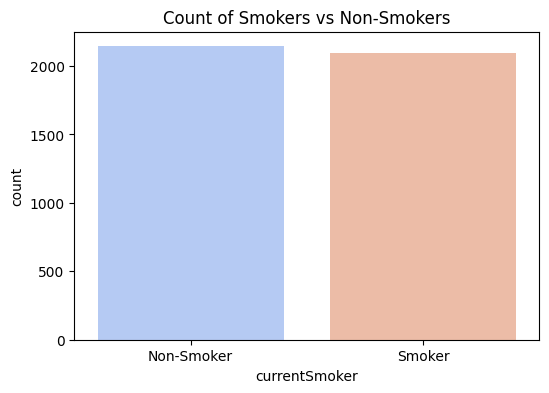

In [19]:
# Count plot of smokers vs non-smokers
plt.figure(figsize=(6,4))
sns.countplot(x='currentSmoker', data=df, palette="coolwarm")
plt.title('Count of Smokers vs Non-Smokers')
plt.xticks([0,1], ['Non-Smoker', 'Smoker'])
plt.show()



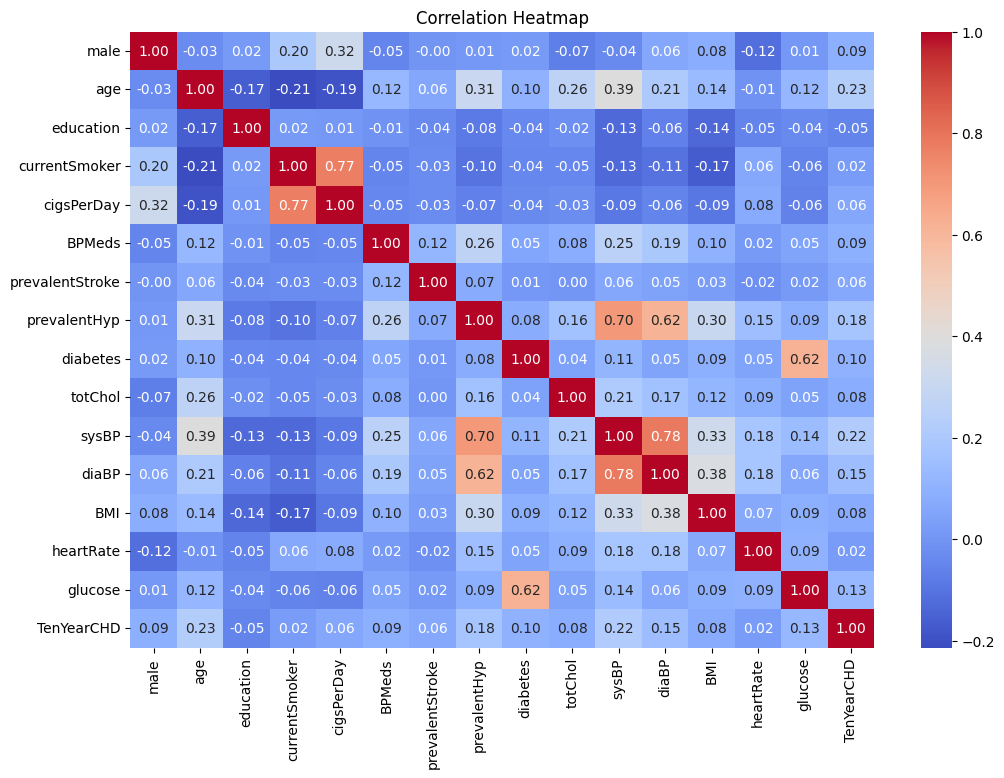

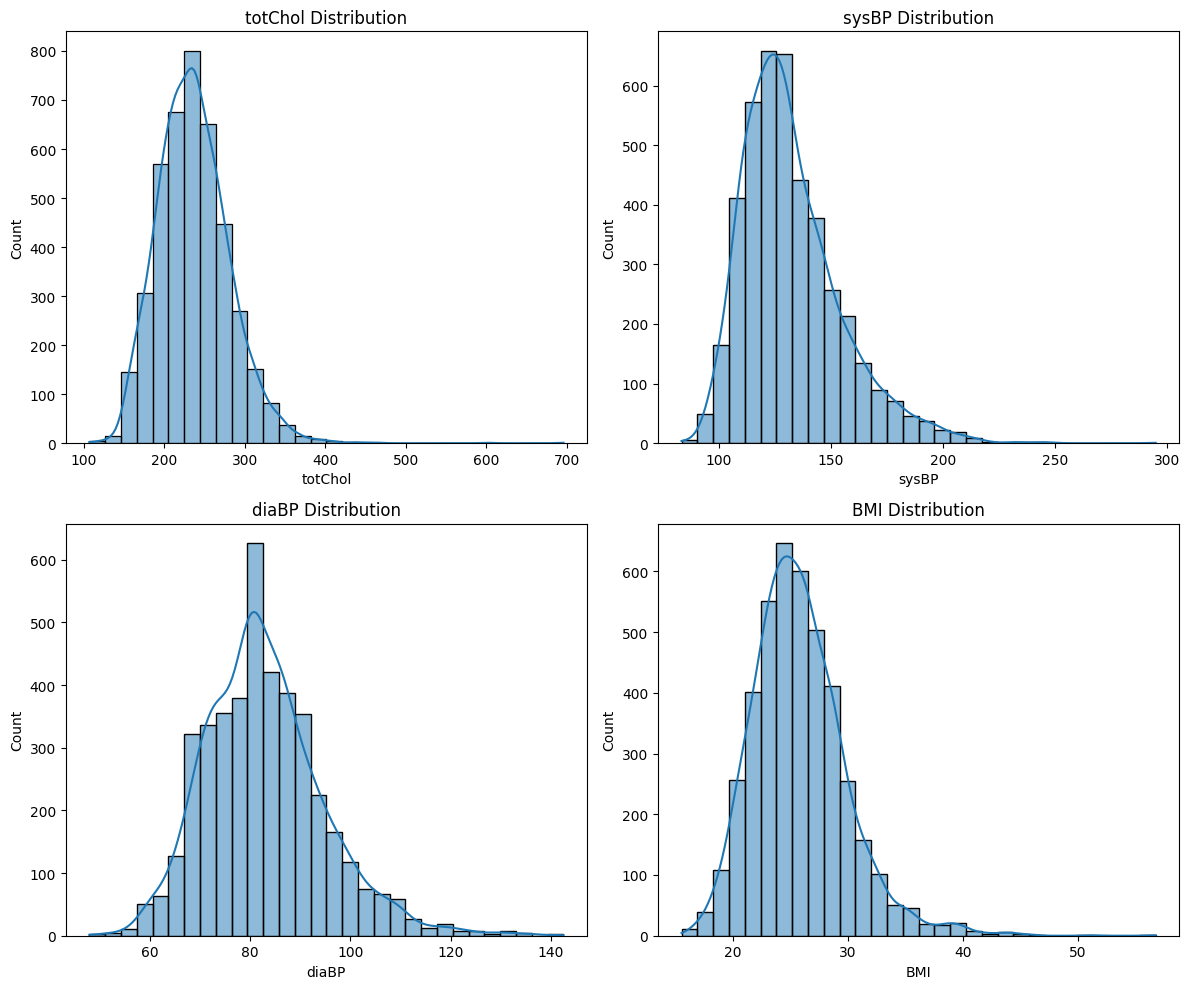

In [20]:
# Correlation heatmap to show relationships between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Histograms for more features (totChol, sysBP, diaBP, BMI)
features = ['totChol', 'sysBP', 'diaBP', 'BMI']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"{feature} Distribution")
    plt.tight_layout()
plt.show()


Training set size: (3390, 15)
Testing set size: (848, 15)

Check for NaN values in X_train_scaled: 0
Check for NaN values in X_test_scaled: 0

Accuracy of the Logistic Regression model: 0.8573113207547169

Confusion Matrix:
 [[718   6]
 [115   9]]


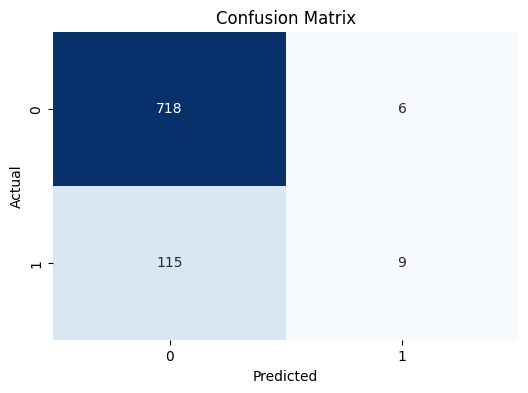


Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       724
         1.0       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



In [24]:
# Step 6: Define features (X) and target (y)   #Predicted to develop heart disease or no
X = df_imputed.drop(columns=['TenYearCHD'])
y = df_imputed['TenYearCHD']

# Step 7: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)

# Step 8: Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 9: Ensure there are no NaNs after scaling
print("\nCheck for NaN values in X_train_scaled:", np.isnan(X_train_scaled).sum().sum())
print("Check for NaN values in X_test_scaled:", np.isnan(X_test_scaled).sum().sum())

# Step 10: Train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Step 11: Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Step 12: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the Logistic Regression model:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Step 13: Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 14: Show Classification Report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)